In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# set this so the 
%matplotlib inline

In [148]:
# Read file
url = 'csv/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

In [149]:
# Show first 10 items
chipo.head(10) 

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [150]:
# Observations
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 126.4+ KB


In [151]:
# Observations
chipo.shape

(4622, 5)

In [152]:
# Show observations x length
chipo.shape[0]

4622

In [153]:
# Show columns
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [154]:
# Show columns length
chipo.shape[1]

5

In [155]:
# Show index
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [156]:
# Show complete data of chipo
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [157]:
# Max Quantity 
# chipo['quantity'].min()
chipo['quantity'].value_counts().count()

9

In [158]:
# For the most-ordered item, how many items were ordered
most_ordered_item = chipo.groupby('item_name')
most_ordered_item = most_ordered_item.sum()
most_ordered_item = most_ordered_item.sort_values(['quantity'], ascending=False)
most_ordered_item.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [159]:
# What was the most ordered item in the choice_description column?
most_choice_description = chipo.groupby('choice_description').sum()
most_choice_description = most_choice_description.sort_values(['quantity'], ascending=False)
most_choice_description.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [160]:
# How many items were orderd in total
ordered_total = chipo['quantity'].sum()
ordered_total

4972

In [161]:
chipo.item_price.dtype

dtype('O')

In [177]:
# Turn the item price into a float
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [178]:
# How much was the revenue for the period in the dataset
revenue = (chipo['quantity']* chipo['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


In [179]:
# How many orders were made in the period
chipo.order_id.value_counts().count()

1834

In [180]:
# What is the average revenue amount per order
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

In [181]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [182]:
avg_revenue = chipo['revenue'].sum()
avg_revenue

39237.02

In [183]:
avg_revenue = chipo.groupby(by=['order_id']).sum()
avg_revenue.mean()['revenue']

21.39423118865867

In [168]:
# How many different items are sold?
chipo.item_name.value_counts().count()

50

In [184]:
# How many products cost more than $10.00

# clean the item_price column and transform it in a float
# prices = [float(value[1 : -1]) for value in chipo.item_price]

# reassign the column with the cleaned prices
# chipo.item_price = prices

# delete the duplicates in item_name and quantity
chipo_filtered = chipo.drop_duplicates(['item_name','quantity','choice_description'])

# select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]
chipo_one_prod[chipo_one_prod['item_price'] > 10]

,order_id,quantity,item_name,choice_description,item_price,revenue
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98,10.98
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75,11.75
...,...,...,...,...,...,...
4593,1825,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Sour Cream, ...",11.75,11.75
4594,1825,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Pinto Beans, Sour ...",11.75,11.75
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75,11.75
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75


In [185]:
# Each item price
chipo[['item_name', 'item_price']]
# remove duplicate item name rows
unique_products = chipo.drop_duplicates(['item_name'])
unique_products[['item_name', 'item_price']]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
6,Side of Chips,1.69
7,Steak Burrito,11.75
8,Steak Soft Tacos,9.25
10,Chips and Guacamole,4.45
11,Chicken Crispy Tacos,8.75


In [186]:
unique_products.count()

order_id              50
quantity              50
item_name             50
choice_description    38
item_price            50
revenue               50
dtype: int64

In [187]:
# Sort products by its name.
# remove duplicate item name
sort_item_name = chipo.drop_duplicates(['item_name'])
# sort_item_name = chipo.sort_values('item_name')
sort_item_name = sort_item_name.sort_values(['item_name'])
sort_item_name

,order_id,quantity,item_name,choice_description,item_price,revenue
298,129,1,6 Pack Soft Drink,[Sprite],6.49,6.49
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75,11.75
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99,8.99
168,75,1,Barbacoa Crispy Tacos,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",11.75,11.75
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
56,26,1,Barbacoa Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Black...",9.25,9.25
34,17,1,Bottled Water,NaN,1.09,1.09
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",22.20,66.60
510,214,1,Burrito,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40,7.40
18,9,2,Canned Soda,[Sprite],2.18,4.36


In [188]:
# What was the quantity of the most expensive item ordered
# remove duplicate order rows
unique_orders = chipo.drop_duplicates(['order_id', 'item_name'])
unique_orders


,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4614,1831,1,Bottled Water,NaN,1.50,1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",8.75,8.75
4616,1832,1,Chips and Guacamole,NaN,4.45,4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75


In [189]:
chipo.sort_values(['item_price'], ascending=False).head(1)

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75


In [190]:
# How many times was a Veggie Salad Bowl ordered
vegg_salad_bowl_orders = chipo[chipo.item_name == 'Veggie Salad Bowl']
len(vegg_salad_bowl_orders)

18

In [191]:
# How many times did someone order more than one Canned Soda
canned_sodda_more_than_one = chipo[(chipo.item_name == 'Canned Soda') & (chipo.quantity > 1)]
len(canned_sodda_more_than_one)

20

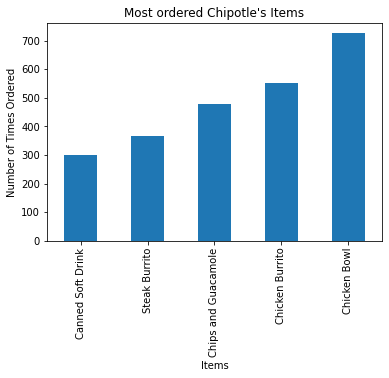

In [202]:
# Create a histogram of the top 5 items bought
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# df = df[0].sort_values(ascending = True)[45:50]
df = df[0].sort_values(ascending = True)
df = df.tail()

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()


(0.0, 36.7)

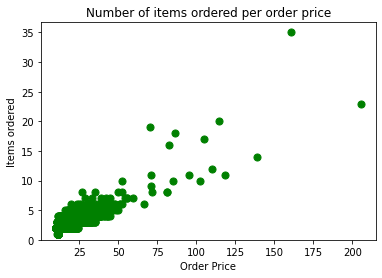

In [204]:
# Create a scatterplot with the number of items orderered per order price
# Price should be in the X-axis and Items ordered in the Y-axis

# create a list of prices
# chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()
# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

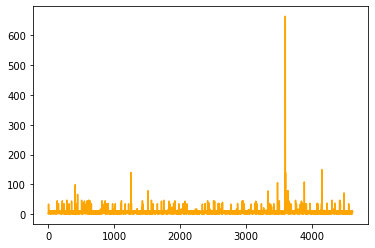

In [213]:
# plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')
plt.plot(chipo.revenue, c = 'orange')
plt.show()

In [215]:
# datatypes or data types
chipo.dtypes


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
revenue               float64
dtype: object

In [216]:
# Summarize the DataFrame.
chipo.describe() #Notice: by default, only the numeric columns are returned. 

,order_id,quantity,item_price,revenue
count,4622.000000,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336,8.489186
std,528.890796,0.410186,4.245557,12.632060
min,1.000000,1.000000,1.090000,1.090000
25%,477.250000,1.000000,3.390000,3.990000
50%,926.000000,1.000000,8.750000,8.750000
75%,1393.000000,1.000000,9.250000,10.980000
max,1834.000000,15.000000,44.250000,663.750000


In [217]:
chipo.mean()

order_id      927.254868
quantity        1.075725
item_price      7.464336
revenue         8.489186
dtype: float64

In [218]:
chipo.max()

order_id                   1834
quantity                     15
item_name     Veggie Soft Tacos
item_price                44.25
revenue                  663.75
dtype: object

In [219]:
chipo.describe(include = "all") #Notice: By default, only the numeric columns are returned.

,order_id,quantity,item_name,choice_description,item_price,revenue
count,4622.000000,4622.000000,4622,3376,4622.000000,4622.000000
unique,NaN,NaN,50,1043,NaN,NaN
top,NaN,NaN,Chicken Bowl,[Diet Coke],NaN,NaN
freq,NaN,NaN,726,134,NaN,NaN
mean,927.254868,1.075725,NaN,NaN,7.464336,8.489186
std,528.890796,0.410186,NaN,NaN,4.245557,12.632060
min,1.000000,1.000000,NaN,NaN,1.090000,1.090000
25%,477.250000,1.000000,NaN,NaN,3.390000,3.990000
50%,926.000000,1.000000,NaN,NaN,8.750000,8.750000
75%,1393.000000,1.000000,NaN,NaN,9.250000,10.980000
